# Initial Drip line evalutation


1. defining the liquid drop model 
2. evaluating the liquid drop model drip lines without ml component
3. adding the ml component to search for drip lines


importing everything thats necessary 

In [1]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize


defining the Liquid Drop model method 

In [2]:
def bindea(z,n):
    a=z+n
    p1=  15.76*(a)
    p2=  -17.81*(a**(2./3.))
    p3=  -0.711 * (z**2.) * a**(-1./3.)   
    p4=  -(23.702*((z-n)**2.))/a

    if(any(z)%2==0 and n%2==0):
        p5=34.*(a**(-3./4.))
        
    elif(any(z)%2==1 and any(n)%2==1):
        p5=-34.*(a**(-3./4.))
        
    else: 
        p5=0
        
    be=p1+p2+p3+p4+p5
    return be

In [3]:
def binde(z,n):
    a=z+n
    p1=  15.76*(a)
    p2=  -17.81*(a**(2./3.))
    p3=  -0.711 * (z**2.) * a**(-1./3.)   
    p4=  -(23.702*((z-n)**2.))/a

    if(z%2==0 and n%2==0):
        p5=34.*(a**(-3./4.))
        
    elif(z%2==1 and n%2==1):
        p5=-34.*(a**(-3./4.))
        
    else: 
        p5=0
        
    be=p1+p2+p3+p4+p5
    return be

importing N, Z and binding energy differences

# Proton Drip Line

In [4]:
zdrip=[]
ndep=[]
zdripndep=[]
initialz=1
finalz=200

nrange= range(1, 178)

for n in nrange:
    #print('n=', n)
    for z in range(initialz, finalz):
        
        befirst=binde(z,n)          #+ rf.predict(   np.array(  [ [n,z  ] ]  )   )
        besecond=binde(z+1,n)       #+ rf.predict(   np.array(  [ [n,z+1] ]  )   )
        separationE=besecond-befirst 
        
        #print('    z=', z)
        if separationE<=0 and besecond>=0 and befirst>=0:
            
            ndep.append(n)
            zdrip.append(z)
            finalz=z+20
            
            if z>=10:
                initialz=z-10
            else:
                initialz=1   
            break
       
            
    

           
lastz=zdrip[-1]


# Neutron Drip Line 

In [5]:
ndrip=[]
zdep=[]
ndripzdep=[]
initialn=1
finaln=200



zrange=range(1, lastz+1)


for z in zrange:
    #print('z=', z)
    for n in range(initialn, finaln):
        
        befirst=binde(z,n)     
        besecond=binde(z,n+1)  
        separationE=besecond-befirst 
        #print('    z=', z)
        if separationE<0 and besecond>0 and befirst>0:
            zdep.append(z)
            ndrip.append(n)
            finaln=n+20
            if z>=10:
                initialn=n-10
            else:
                initialn=1  
            break
    #print('\n')




#print(zdep, '\n')
#print(ndrip, '\n')


#print(np.shape(zdep))
#print(np.shape(ndrip))



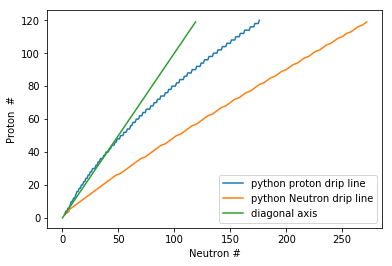

ndep: the proton drip that is iterating through n, 
it should be regular
[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177] 

zdrip: the proton drip that is dependent on n, 
it should be irregular
[  2   4   4   6   6   8  10  10  12  12  14  16  16  18  18  20  20  22
  22  24  24  26  26  28  28  30  30  30  32  32  34  34  36  36  

In [6]:
zdripndep = np.transpose(np.stack((zdrip,ndep )))
ndripzdep = np.transpose(np.stack((zdep,ndrip )))

plt.plot(np.transpose(zdripndep)[1][0:-1], np.transpose(zdripndep)[0][0:-1],label='python proton drip line')
plt.plot(np.transpose(ndripzdep)[1][0:-1], np.transpose(ndripzdep)[0][0:-1],label='python Neutron drip line')
plt.plot(range(0,120),range(0,120),label='diagonal axis')
plt.ylabel('Proton  #')
plt.xlabel('Neutron #')
plt.legend()
plt.show()


print('ndep: the proton drip that is iterating through n, ')
print('it should be regular') 
print(np.transpose(zdripndep)[1], '\n')

print('zdrip: the proton drip that is dependent on n, ')
print('it should be irregular')
print(np.transpose(zdripndep)[0], '\n\n\n')

print('zdep: the neutron drip is iterating through z')
print('it should be regular')
print(np.transpose(ndripzdep)[0], '\n')

print('ndrip: the Neoutron Drip that is dependent on z')
print('it should be irregular')
print(np.transpose(ndripzdep)[1], '\n')


## plotting all experimental - LDM with unmodified ldm drip lines

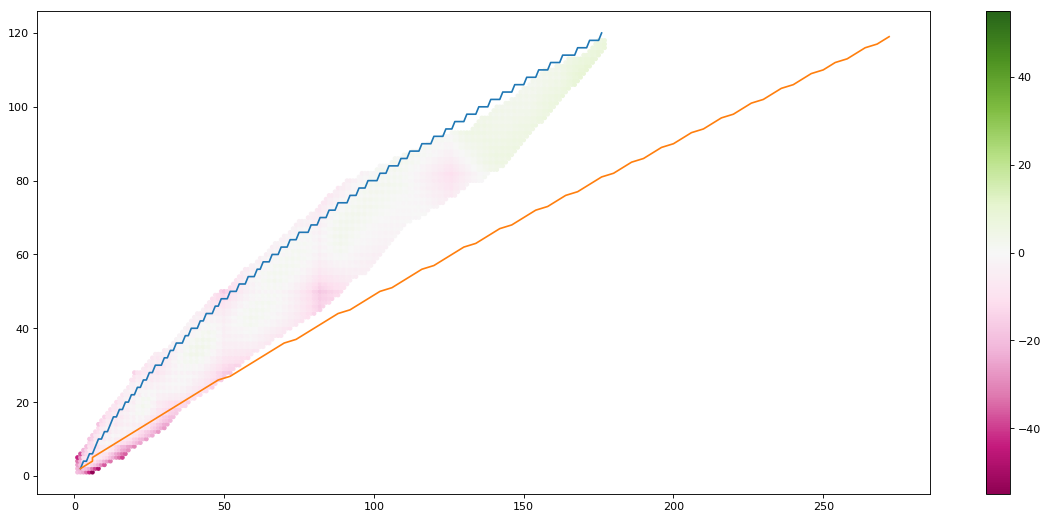

In [7]:
y_the=[]
N_exp = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=3) #Number of neutrons
Z_exp = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=4) #Number of protons
X_exp = np.transpose(np.stack((Z_exp,N_exp)))
A_exp = N_exp+Z_exp # Total number of Nucleons

# Difference between the experimental binding energy and the Liquid drop model
y_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=5)
y_the=bindea(Z_exp,N_exp)
the_exp_diff=y_the-y_exp


ext = np.int(np.ceil(max(-np.min(the_exp_diff),np.max(the_exp_diff))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_exp,Z_exp,c=the_exp_diff,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.plot(np.transpose(zdripndep)[1][0:-1], np.transpose(zdripndep)[0][0:-1],label='python proton drip line')
plt.plot(np.transpose(ndripzdep)[1][0:-1], np.transpose(ndripzdep)[0][0:-1],label='python Neutron drip line')
plt.colorbar(sc)
plt.show()


In [8]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

In [9]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_exp, the_exp_diff, test_size =0.25, random_state=42 )
    
#fitting the rf to the training values
rf.fit(X_train, y_train);
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))


testdiff= the_exp_diff - rf.predict(X_exp)




0.9940908876434186
0.9626611727885521


In [22]:
#zdripndep = np.transpose(np.stack((zdrip,ndep )))
#ndripzdep = np.transpose(np.stack((zdep,ndrip )))
def ki(exp_the):
    ki_2=0
    
    for exp_the_i in exp_the:
        
        #print(exp_the_i[0])
        #print(exp_the_i[1])
        ki_2=ki_2+(exp_the_i[0]-exp_the_i[1])**2

    return ki_2/len(exp_the)



y_exp_the=np.transpose(np.stack((y_exp,y_the)))
print(np.shape(y_exp))
print(np.shape(y_the))
print(y_exp_the[0])

print(np.sqrt(ki(y_exp_the)))

(3433,)
(3433,)
[  2.224552   -17.53245476]
6.263231830598698


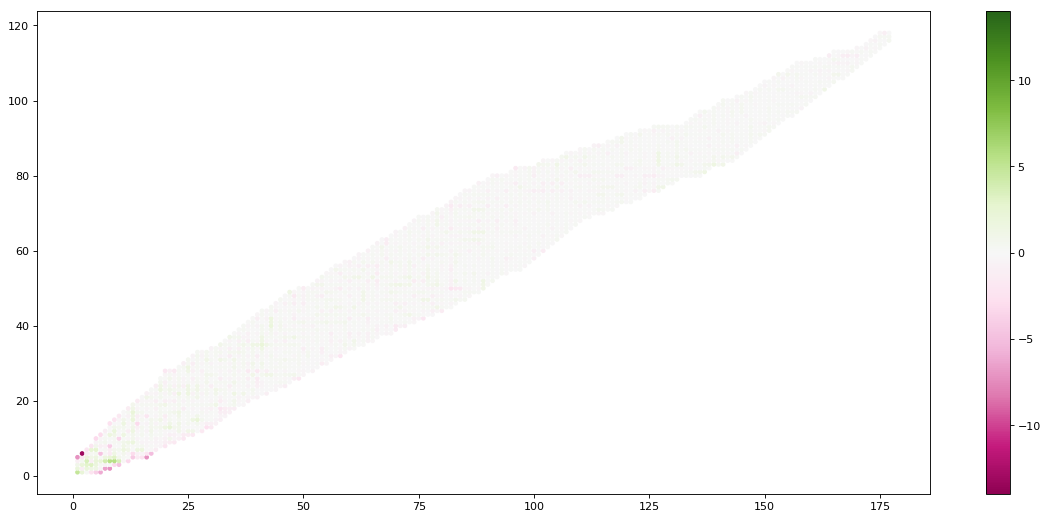

No handles with labels found to put in legend.


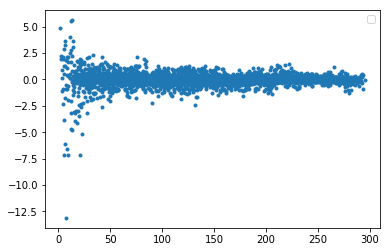

In [10]:
ext = np.int(np.ceil(max(-np.min(testdiff),np.max(testdiff))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_exp,Z_exp,c=testdiff,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


#plt.plot(np.transpose(zdripndep)[1][0:-1], np.transpose(zdripndep)[0][0:-1],label='python proton drip line')
#plt.plot(np.transpose(ndripzdep)[1][0:-1], np.transpose(ndripzdep)[0][0:-1],label='python Neutron drip line')
#plt.plot(range(0,120),range(0,120),label='diagonal axis')


plt.plot(N_exp+Z_exp,testdiff, 'o', markersize=3)
plt.legend()
plt.show()





# Proton Drip Line with ml

In [11]:
zdrip_ml=[]
ndep_ml=[]
zdripndep_ml=[]
initialz=1
finalz=200

nrange= range(1, 178)

for n in nrange:
    print('n=', n)
    for z in range(initialz, finalz):
        
        befirst=binde(z,n)          + rf.predict(   np.array(  [ [z,n  ] ]  )   )
        besecond=binde(z+1,n)       + rf.predict(   np.array(  [ [z+1,n] ]  )   )
        separationE=besecond-befirst 
        
        #print('    z=', z)
        if separationE<=0 and besecond>=0 and befirst>=0:
            
            ndep_ml.append(n)
            zdrip_ml.append(z)
            finalz=z+20
            
            if z>=10:
                initialz=z-10
            else:
                initialz=1   
            break
       
            
    

           
lastz=zdrip_ml[-1]


n= 1
n= 2
n= 3
n= 4
n= 5
n= 6
n= 7
n= 8
n= 9
n= 10
n= 11
n= 12
n= 13
n= 14
n= 15
n= 16
n= 17
n= 18
n= 19
n= 20
n= 21
n= 22
n= 23
n= 24
n= 25
n= 26
n= 27
n= 28
n= 29
n= 30
n= 31
n= 32
n= 33
n= 34
n= 35
n= 36
n= 37
n= 38
n= 39
n= 40
n= 41
n= 42
n= 43
n= 44
n= 45
n= 46
n= 47
n= 48
n= 49
n= 50
n= 51
n= 52
n= 53
n= 54
n= 55
n= 56
n= 57
n= 58
n= 59
n= 60
n= 61
n= 62
n= 63
n= 64
n= 65
n= 66
n= 67
n= 68
n= 69
n= 70
n= 71
n= 72
n= 73
n= 74
n= 75
n= 76
n= 77
n= 78
n= 79
n= 80
n= 81
n= 82
n= 83
n= 84
n= 85
n= 86
n= 87
n= 88
n= 89
n= 90
n= 91
n= 92
n= 93
n= 94
n= 95
n= 96
n= 97
n= 98
n= 99
n= 100
n= 101
n= 102
n= 103
n= 104
n= 105
n= 106
n= 107
n= 108
n= 109
n= 110
n= 111
n= 112
n= 113
n= 114
n= 115
n= 116
n= 117
n= 118
n= 119
n= 120
n= 121
n= 122
n= 123
n= 124
n= 125
n= 126
n= 127
n= 128
n= 129
n= 130
n= 131
n= 132
n= 133
n= 134
n= 135
n= 136
n= 137
n= 138
n= 139
n= 140
n= 141
n= 142
n= 143
n= 144
n= 145
n= 146
n= 147
n= 148
n= 149
n= 150
n= 151
n= 152
n= 153
n= 154
n= 155
n= 156
n= 157
n= 158
n=

# Neutron Drip Line with ml

In [12]:
ndrip_ml=[]
zdep_ml=[]
ndripzdep_ml=[]
initialn=1
finaln=200



zrange=range(1, lastz+1)


for z in zrange:
    print('z=', z)
    for n in range(initialn, finaln):
        
        befirst=binde(z,n)      + rf.predict(   np.array(  [ [z,n  ] ]  )   )     
        besecond=binde(z,n+1)   + rf.predict(   np.array(  [ [z,n+1  ] ]  )   )
        separationE=besecond-befirst 
        
        #print('    z=', z)
        if separationE<0 and besecond>0 and befirst>0:
            zdep_ml.append(z)
            ndrip_ml.append(n)
            finaln=n+20
            if z>=10:
                initialn=n-10
            else:
                initialn=1  
            break
    #print('\n')




#print(zdep, '\n')
#print(ndrip, '\n')


#print(np.shape(zdep))
#print(np.shape(ndrip))



z= 1
z= 2
z= 3
z= 4
z= 5
z= 6
z= 7
z= 8
z= 9
z= 10
z= 11
z= 12
z= 13
z= 14
z= 15
z= 16
z= 17
z= 18
z= 19
z= 20
z= 21
z= 22
z= 23
z= 24
z= 25
z= 26
z= 27
z= 28
z= 29
z= 30
z= 31
z= 32
z= 33
z= 34
z= 35
z= 36
z= 37
z= 38
z= 39
z= 40
z= 41
z= 42
z= 43
z= 44
z= 45
z= 46
z= 47
z= 48
z= 49
z= 50
z= 51
z= 52
z= 53
z= 54
z= 55
z= 56
z= 57
z= 58
z= 59
z= 60
z= 61
z= 62
z= 63
z= 64
z= 65
z= 66
z= 67
z= 68
z= 69
z= 70
z= 71
z= 72
z= 73
z= 74
z= 75
z= 76
z= 77
z= 78
z= 79
z= 80
z= 81
z= 82
z= 83
z= 84
z= 85
z= 86
z= 87
z= 88
z= 89
z= 90
z= 91
z= 92
z= 93
z= 94
z= 95
z= 96
z= 97
z= 98
z= 99
z= 100
z= 101
z= 102
z= 103
z= 104
z= 105
z= 106
z= 107
z= 108
z= 109
z= 110
z= 111
z= 112
z= 113
z= 114
z= 115
z= 116
z= 117
z= 118
z= 119
z= 120


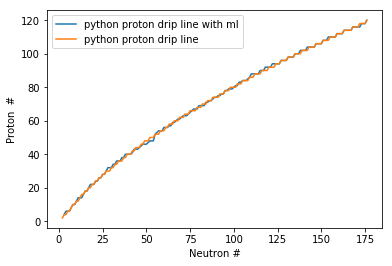

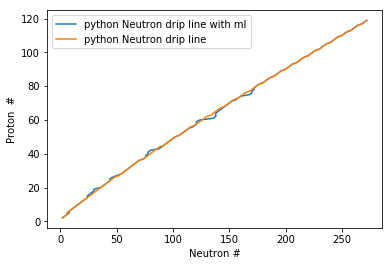

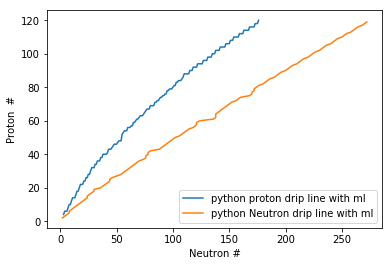

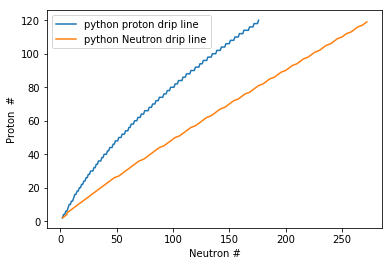

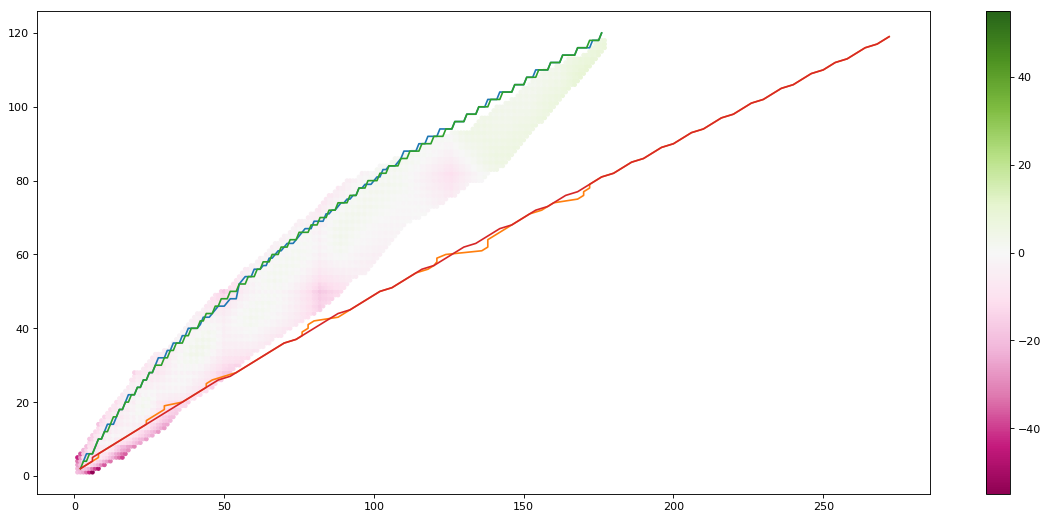

In [13]:
zdripndep_ml = np.transpose(np.stack((zdrip_ml,ndep_ml )))
ndripzdep_ml = np.transpose(np.stack((zdep_ml ,ndrip_ml )))

plt.plot(np.transpose(zdripndep_ml)[1][0:-1], np.transpose(zdripndep_ml)[0][0:-1],label='python proton drip line with ml')
#plt.plot(np.transpose(ndripzdep_ml)[1][0:-1], np.transpose(ndripzdep_ml)[0][0:-1],label='python Neutron drip line with ml')
plt.plot(np.transpose(zdripndep)[1][0:-1], np.transpose(zdripndep)[0][0:-1],label='python proton drip line')
#plt.plot(np.transpose(ndripzdep)[1][0:-1], np.transpose(ndripzdep)[0][0:-1],label='python Neutron drip line')
#plt.plot(range(0,120),range(0,120),label='diagonal axis')
plt.ylabel('Proton  #')
plt.xlabel('Neutron #')
plt.legend()
plt.show()


#plt.plot(np.transpose(zdripndep_ml)[1][0:-1], np.transpose(zdripndep_ml)[0][0:-1],label='python proton drip line with ml')
plt.plot(np.transpose(ndripzdep_ml)[1][0:-1], np.transpose(ndripzdep_ml)[0][0:-1],label='python Neutron drip line with ml')
#plt.plot(np.transpose(zdripndep)[1][0:-1], np.transpose(zdripndep)[0][0:-1],label='python proton drip line')
plt.plot(np.transpose(ndripzdep)[1][0:-1], np.transpose(ndripzdep)[0][0:-1],label='python Neutron drip line')
#plt.plot(range(0,120),range(0,120),label='diagonal axis')
plt.ylabel('Proton  #')
plt.xlabel('Neutron #')
plt.legend()
plt.show()


plt.plot(np.transpose(zdripndep_ml)[1][0:-1], np.transpose(zdripndep_ml)[0][0:-1],label='python proton drip line with ml')
plt.plot(np.transpose(ndripzdep_ml)[1][0:-1], np.transpose(ndripzdep_ml)[0][0:-1],label='python Neutron drip line with ml')
#plt.plot(np.transpose(zdripndep)[1][0:-1], np.transpose(zdripndep)[0][0:-1],label='python proton drip line')
#plt.plot(np.transpose(ndripzdep)[1][0:-1], np.transpose(ndripzdep)[0][0:-1],label='python Neutron drip line')
#plt.plot(range(0,120),range(0,120),label='diagonal axis')
plt.ylabel('Proton  #')
plt.xlabel('Neutron #')
plt.legend()
plt.show()

#plt.plot(np.transpose(zdripndep_ml)[1][0:-1], np.transpose(zdripndep_ml)[0][0:-1],label='python proton drip line with ml')
#plt.plot(np.transpose(ndripzdep_ml)[1][0:-1], np.transpose(ndripzdep_ml)[0][0:-1],label='python Neutron drip line with ml')
plt.plot(np.transpose(zdripndep)[1][0:-1], np.transpose(zdripndep)[0][0:-1],label='python proton drip line')
plt.plot(np.transpose(ndripzdep)[1][0:-1], np.transpose(ndripzdep)[0][0:-1],label='python Neutron drip line')
#plt.plot(range(0,120),range(0,120),label='diagonal axis')
plt.ylabel('Proton  #')
plt.xlabel('Neutron #')
plt.legend()
plt.show()

ext = np.int(np.ceil(max(-np.min(the_exp_diff),np.max(the_exp_diff))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_exp,Z_exp,c=the_exp_diff,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.plot(np.transpose(zdripndep_ml)[1][0:-1], np.transpose(zdripndep_ml)[0][0:-1],label='ml python proton drip line')
plt.plot(np.transpose(ndripzdep_ml)[1][0:-1], np.transpose(ndripzdep_ml)[0][0:-1],label='ml python Neutron drip line')
plt.plot(np.transpose(zdripndep)[1][0:-1], np.transpose(zdripndep)[0][0:-1],label='python proton drip line')
plt.plot(np.transpose(ndripzdep)[1][0:-1], np.transpose(ndripzdep)[0][0:-1],label='python Neutron drip line')
plt.colorbar(sc)
plt.show()
#print('ndep: the proton drip that is iterating through n, ')
#print('it should be regular') 
#print(np.transpose(zdripndep_ml)[1], '\n')

#print('zdrip: the proton drip that is dependent on n, ')
#print('it should be irregular')
#print(np.shape(np.transpose(zdripndep_ml)[0]), '\n\n\n')

#print('zdrip: the proton drip that is dependent on n, ')
#print('it should be irregular')
#print(np.shape(np.transpose(zdripndep)[0]), '\n\n\n')

#print('zdrip: the proton drip that is dependent on n, ')
#print('it should be irregular')
#print(np.transpose(zdripndep_ml)[0], '\n\n\n')

#print('zdrip: the proton drip that is dependent on n, ')
#print('it should be irregular')
#print(np.transpose(zdripndep)[0], '\n\n\n')



#print('zdep: the neutron drip is iterating through z')
#print('it should be regular')
#print(np.transpose(ndripzdep_ml)[0], '\n')

#print('ndrip: the Neoutron Drip that is dependent on z')
#print('it should be irregular')
#print(np.transpose(ndripzdep_ml)[1], '\n')


#zdripdiff=np.transpose(zdripndep_ml)[0]-np.transpose(zdripndep)[0]
#ndripdiff=np.transpose(ndripzdep_ml)[1]-np.transpose(ndripzdep)[1]



# Diferent Models

In [14]:
#Symbol Z  N A Binding_Energy_(MeV)  S_p_(MeV)  S_{2p}_(MeV) S_n_(MeV)  S_{2n}_(MeV) Q_{alpha}_(MeV)       


N_SKMS   = np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=2) #Number of neutrons
Z_SKMS   = np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=1) #Number of protons
X_SKMS   = np.transpose(np.stack((Z_SKMS,N_SKMS)))
A_SKMS   = N_SKMS+Z_SKMS # Total number of Nucleons
y_SKMS   = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=4)
S_p_SKMS = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=5)


N_SKP = np.genfromtxt('SKP_all_nuclei.dat',usecols=2) #Number of neutrons
Z_SKP = np.genfromtxt('SKP_all_nuclei.dat',usecols=1) #Number of protons
X_SKP = np.transpose(np.stack((Z_SKP,N_SKP)))
A_SKP = N_SKP+Z_SKP # Total number of Nucleons
y_SKP = -np.genfromtxt('SKP_all_nuclei.dat',usecols=4)

N_SLY4 = np.genfromtxt('SLY4_all_nuclei-new.dat',usecols=2) #Number of neutrons
Z_SLY4 = np.genfromtxt('SLY4_all_nuclei-new.dat',usecols=1) #Number of protons
X_SLY4 = np.transpose(np.stack((Z_SLY4,N_SLY4)))
A_SLY4 = N_SLY4+Z_SLY4 # Total number of Nucleons
y_SLY4 = -np.genfromtxt('SLY4_all_nuclei-new.dat',usecols=4)

N_SV = np.genfromtxt('SV-MIN_all_nuclei-new.dat',usecols=2) #Number of neutrons
Z_SV = np.genfromtxt('SV-MIN_all_nuclei-new.dat',usecols=1) #Number of protons
X_SV = np.transpose(np.stack((Z_SV,N_SV)))
A_SV = N_SV+Z_SV # Total number of Nucleons
y_SV = -np.genfromtxt('SV-MIN_all_nuclei-new.dat',usecols=4)

N_UNEDF0 = np.genfromtxt('UNEDF0_all_nuclei-new.dat',usecols=2) #Number of neutrons
Z_UNEDF0 = np.genfromtxt('UNEDF0_all_nuclei-new.dat',usecols=1) #Number of protons
X_UNEDF0 = np.transpose(np.stack((Z_UNEDF0,N_UNEDF0)))
A_UNEDF0 = N_UNEDF0+Z_UNEDF0 # Total number of Nucleons
y_UNEDF0 = -np.genfromtxt('UNEDF0_all_nuclei-new.dat',usecols=4)

N_UNEDF1 = np.genfromtxt('UNEDF1_all_nuclei-new.dat',usecols=2) #Number of neutrons
Z_UNEDF1 = np.genfromtxt('UNEDF1_all_nuclei-new.dat',usecols=1) #Number of protons
X_UNEDF1 = np.transpose(np.stack((Z_UNEDF1,N_UNEDF1)))
A_UNEDF1 = N_UNEDF1+Z_UNEDF1 # Total number of Nucleons
y_UNEDF1 = -np.genfromtxt('UNEDF1_all_nuclei-new.dat',usecols=4)





In [15]:
X_matSKMS      =[]
y_matSKMS      =[]
y_expSKMS      =[]

X_matSKP       =[]
y_matSKP       =[]
y_expSKP       =[]

X_matSLY4      =[]
y_matSLY4      =[]
y_expSLY4      =[]


X_matSV        =[]
y_matSV        =[]
y_expSV        =[]


X_matUNEDF0    =[]
y_matUNEDF0    =[]
y_expUNEDF0    =[]


X_matUNEDF1    =[]
y_matUNEDF1    =[]
y_expUNEDF1    =[]





for exp in range(1, len(X_exp)):
    #print('exp',exp)
    for the in range(0, len(X_SKMS)):      #len(X_SKMS)):
        if X_exp[exp][0]==X_SKMS[the][0] and X_exp[exp][1]==X_SKMS[the][1]:
            X_matSKMS.append(X_exp[exp])
            y_matSKMS.append(y_SKMS[the])
            y_expSKMS.append(y_exp[exp])
            break
            
        
print('SKMS done')            
for exp in range(1, len(X_exp)):
    #print('exp',exp)
    for the in range(0, len(X_SKP)):      #len(X_SKMS)):
        if X_exp[exp][0]==X_SKP[the][0] and X_exp[exp][1]==X_SKP[the][1]:
            X_matSKP.append(X_exp[exp])
            y_matSKP.append(y_SKP[the])
            y_expSKP.append(y_exp[exp])
            break
            
            
print('SKP done')
for exp in range(1, len(X_exp)):
    #print('exp',exp)
    for the in range(0, len(X_SLY4)):      #len(X_SKMS)):
        if X_exp[exp][0]==X_SLY4[the][0] and X_exp[exp][1]==X_SLY4[the][1]:
            X_matSLY4.append(X_exp[exp])
            y_matSLY4.append(y_SLY4[the])
            y_expSLY4.append(y_exp[exp])
            break

             
print('SLY4 done')
for exp in range(1, len(X_exp)):
    #print('exp',exp)
    for the in range(0, len(X_SV)):      #len(X_SKMS)):
        if X_exp[exp][0]==X_SV[the][0] and X_exp[exp][1]==X_SV[the][1]:
            X_matSV.append(X_exp[exp])
            y_matSV.append(y_SV[the])
            y_expSV.append(y_exp[exp])
            break
            
print('SV done')
for exp in range(1, len(X_exp)):
    #print('exp',exp)
    for the in range(0, len(X_UNEDF0)):      #len(X_SKMS)):
        if X_exp[exp][0]==X_UNEDF0[the][0] and X_exp[exp][1]==X_UNEDF0[the][1]:
            X_matUNEDF0.append(X_exp[exp])
            y_matUNEDF0.append(y_UNEDF0[the])
            y_expUNEDF0.append(y_exp[exp])
            break
            

print('UNEDF0 done')
for exp in range(1, len(X_exp)):
    #print('exp',exp)
    for the in range(0, len(X_UNEDF1)):      #len(X_SKMS)):
        if X_exp[exp][0]==X_UNEDF1[the][0] and X_exp[exp][1]==X_UNEDF1[the][1]:
            X_matUNEDF1.append(X_exp[exp])
            y_matUNEDF1.append(y_UNEDF1[the])
            y_expUNEDF1.append(y_exp[exp])
            break

print('UNEDF1 done')         

 

SKMS done
SKP done
SLY4 done
SV done
UNEDF0 done
UNEDF1 done


In [16]:
#all match with eachother and their experimental values
X_matall       =[]

y_allmatSKMS   =[]
y_allmatSKP    =[]
y_allmatSLY4   =[]
y_allmatSV     =[]
y_allmatUNEDF0 =[]
y_allmatUNEDF1 =[]


for the1 in range(0,len(X_matSKMS)):
    
    for the2 in range(0,len(X_matSKP)):
        if X_matSKMS[the1][0]==X_matSKP[the2][0] and X_matSKMS[the1][1]==X_matSKP[the2][1]:    
            
            for the3 in range(0,len(X_matSLY4)):
                if X_matSKP[the2][0]==X_matSLY4[the3][0] and X_matSKP[the2][1]==X_matSLY4[the3][1]:
                    
                    for the4 in range(0,len(X_matSV)):
                        if X_matSLY4[the3][0]==X_matSV[the4][0] and X_matSLY4[the3][1]==X_matSV[the4][1]:
                            
                            for the5 in range(0,len(X_matUNEDF0)):
                                if X_matSV[the4][0]==X_matUNEDF0[the5][0] and X_matSV[the4][1]==X_matUNEDF0[the5][1]:
                                    
                                    for the6 in range(0,len(X_matUNEDF1)):
                                        if X_matUNEDF0[the5][0]==X_matUNEDF1[the6][0] and X_matUNEDF0[the5][1]==X_matUNEDF1[the6][1]:
                                            X_matall.append(X_matUNEDF1[the6])   #appending all the z n values
                                            y_allmatSKMS.append(y_matSKMS[the1]) #appending all the SKMS values
                                            y_allmatSKP.append(y_matSKP[the2])   #appending all the SKP values
                                            y_allmatSLY4.append(y_matSLY4[the3]) #etc
                                            y_allmatSV.append(y_matSV[the4])
                                            y_allmatUNEDF0.append(y_matUNEDF0[the5])
                                            y_allmatUNEDF1.append(y_matUNEDF1[the6])
        

In [17]:
X_matSKMS=np.array(X_matSKMS)
y_matSKMS=np.array(y_matSKMS)

X_matSKP=np.array(X_matSKP)
y_matSKP=np.array(y_matSKP)

X_matSLY4=np.array(X_matSLY4)
y_matSLY4=np.array(y_matSLY4)

X_matSV=np.array(X_matSV)
y_matSV=np.array(y_matSV)

X_matUNEDF0=np.array(X_matUNEDF0)
y_matUNEDF0=np.array(y_matUNEDF0)

X_matUNEDF1=np.array(X_matUNEDF1)
y_matUNEDF1=np.array(y_matUNEDF1)

X_matall        =np.array(X_matall)
y_allmatSKMS    =np.array(y_allmatSKMS)
y_allmatSKP     =np.array(y_allmatSKP)
y_allmatSLY4    =np.array(y_allmatSLY4)
y_allmatSV      =np.array(y_allmatSV)
y_allmatUNEDF0  =np.array(y_allmatUNEDF0)
y_allmatUNEDF1  =np.array(y_allmatUNEDF1)

print(np.shape(X_matall)    )   
print(np.shape(y_allmatSKMS) )  
print(np.shape(y_allmatSKP  ) ) 
print(np.shape(y_allmatSLY4  ) )
print(np.shape(y_allmatSV     ))
print(np.shape(y_allmatUNEDF0 ))
print(np.shape(y_allmatUNEDF1 ))


(3228, 2)
(3228,)
(3228,)
(3228,)
(3228,)
(3228,)
(3228,)


In [18]:
y_allmatexp=[]

for matall in range(0, len(X_matall)): #should be X_matall
    #print('exp',exp)
    for exp in range(0, len(X_exp)):      #should be X_exp
        
        
        if X_matall[matall][0]==X_exp[exp][0] and X_matall[matall][1]==X_exp[exp][1]:
            y_allmatexp.append(y_exp[exp])
            break

In [27]:
y_matall=[]


y_matall.append(np.transpose(X_matall)[0])
y_matall.append(np.transpose(X_matall)[1])
y_matall.append(y_allmatSKMS)    
y_matall.append(y_allmatSKP)     
y_matall.append(y_allmatSLY4)    
y_matall.append(y_allmatSV)      
y_matall.append(y_allmatUNEDF0) 
y_matall.append(y_allmatUNEDF1)            

#y_matall.append(y_allmatexp)            

y_matall=np.array(y_matall)


print(np.shape(y_matall))
print('Z       y_matall[0][0]: ', y_matall[0][0], 'shape: ', np.shape(y_matall[0]))
print('N       y_matall[1][0]: ', y_matall[1][0], 'shape: ', np.shape(y_matall[1]))
print('SKMS    y_matall[2][0]: ', y_matall[2][0], 'shape: ', np.shape(y_matall[2]))

print('SKP     y_matall[3][0]: ', y_matall[3][0], 'shape: ', np.shape(y_matall[3]))
print('SLY4    y_matall[4][0]: ', y_matall[4][0], 'shape: ', np.shape(y_matall[4]))
print('SV      y_matall[5][0]: ', y_matall[5][0], 'shape: ', np.shape(y_matall[5]))

print('UNEDF0  y_matall[6][0]: ', y_matall[6][0], 'shape: ', np.shape(y_matall[6]))
print('UNEDF1  y_matall[7][0]: ', y_matall[7][0], 'shape: ', np.shape(y_matall[7]))

#print('exp     y_matall[8][0]: ', y_matall[8][0], 'shape: ', np.shape(y_matall[8]))

(8, 3228)
Z       y_matall[0][0]:  2.0 shape:  (3228,)
N       y_matall[1][0]:  2.0 shape:  (3228,)
SKMS    y_matall[2][0]:  30.01944 shape:  (3228,)
SKP     y_matall[3][0]:  29.983718 shape:  (3228,)
SLY4    y_matall[4][0]:  30.710089 shape:  (3228,)
SV      y_matall[5][0]:  30.636386 shape:  (3228,)
UNEDF0  y_matall[6][0]:  28.722356 shape:  (3228,)
UNEDF1  y_matall[7][0]:  18.702212 shape:  (3228,)


In [28]:
rf_all=RandomForestRegressor(n_estimators=1000) 
y_matall=np.transpose(y_matall)

In [29]:

X_train, X_test, y_train, y_test = train_test_split(y_matall, y_allmatexp, test_size =0.25, random_state=42 )
    
#fitting the rf to the training values
rf_all.fit(X_train, y_train);
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))
print(rf.score(y_matall, y_allmatexp))



ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 8 

In [30]:
diff=y_allmatexp-rf_all.predict(y_matall)

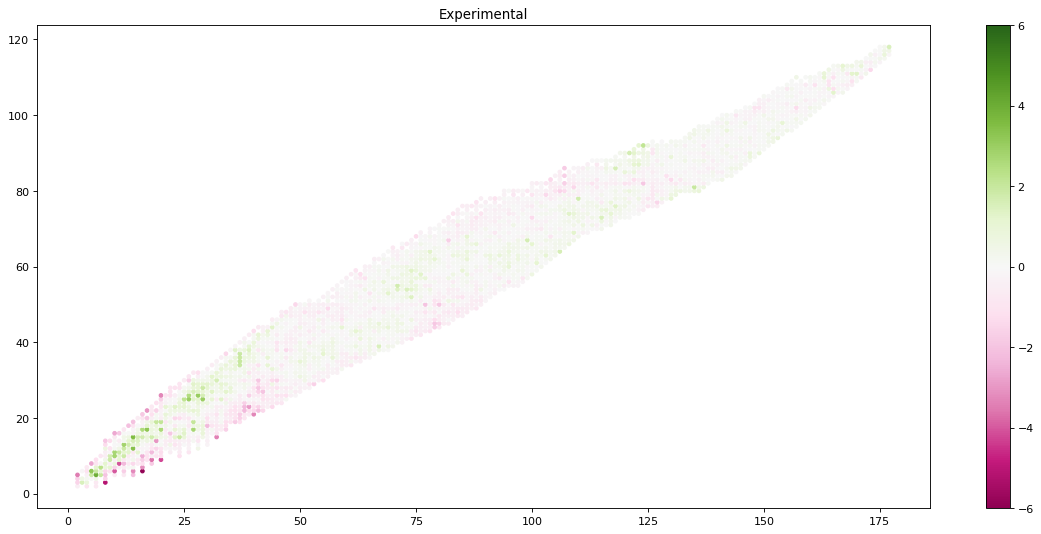

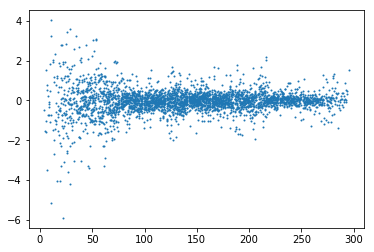

In [31]:
ext = np.int(np.ceil(max(-np.min(diff),np.max(diff))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matall)[1],np.transpose(X_matall)[0],c=diff,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('Experimental')
plt.colorbar(sc)
plt.show()

plt.plot(np.transpose(X_matall)[1]+np.transpose(X_matall)[0], diff, 'o', markersize=1)
plt.show()

# All experimental values

In [32]:
ext = np.int(np.ceil(max(-np.min(y_exp),np.max(y_exp))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(,np.transpose(X_exp)[0],c=y_exp,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('Experimental')
plt.colorbar(sc)
plt.show()


print(np.shape(X_exp),)
print(np.shape(y_exp), '\n')

SyntaxError: invalid syntax (<ipython-input-32-40dc8066d9a0>, line 3)

# All theoretical Values

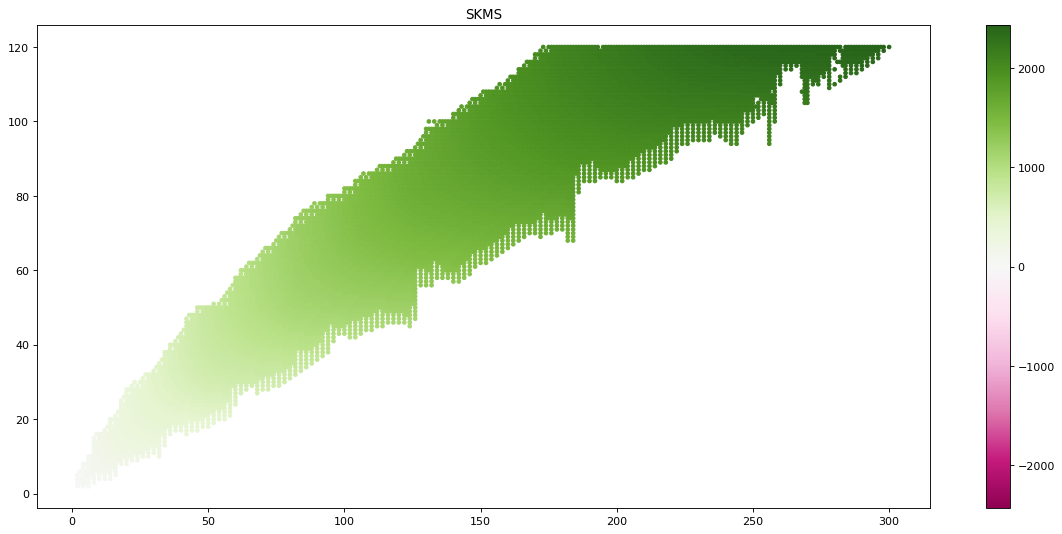

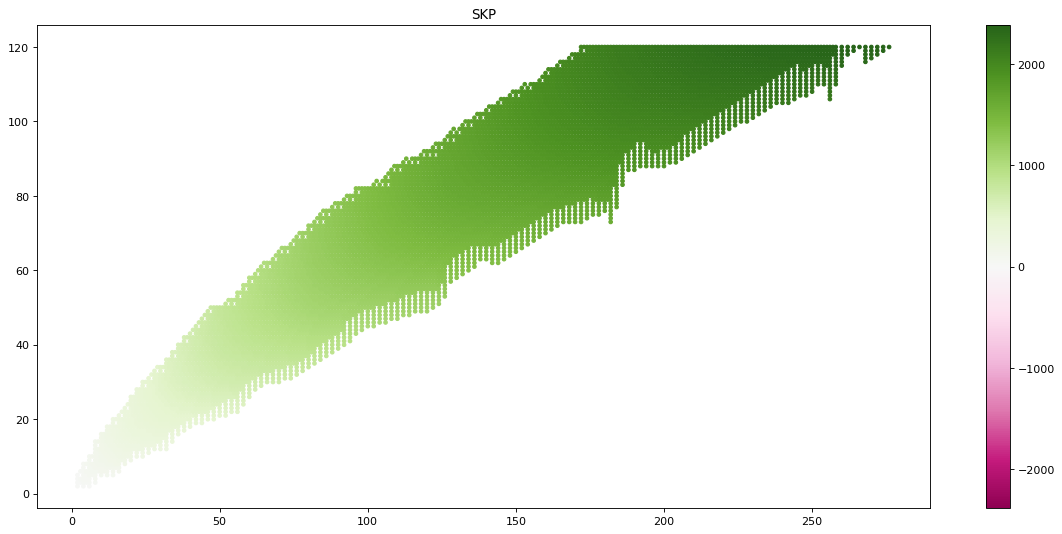

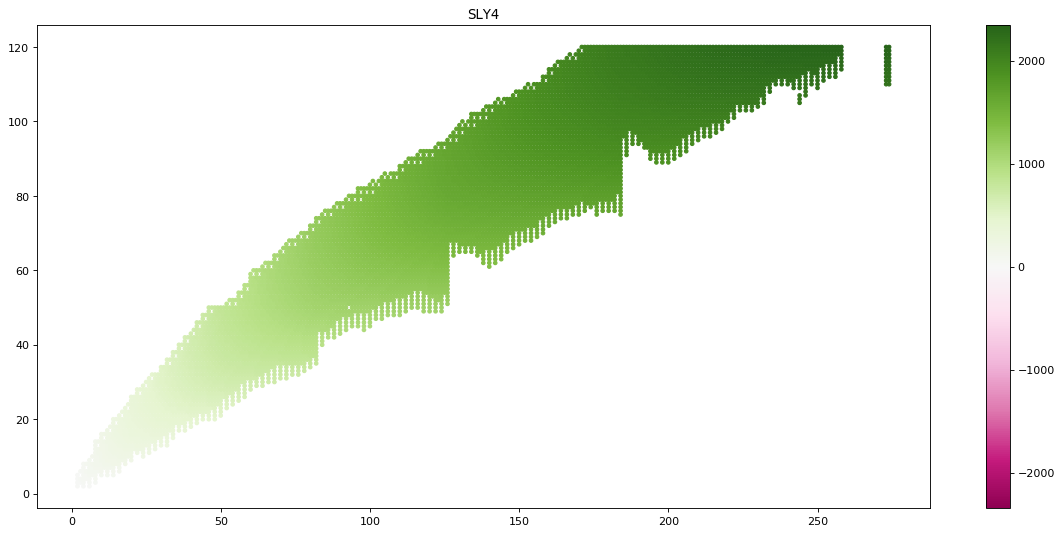

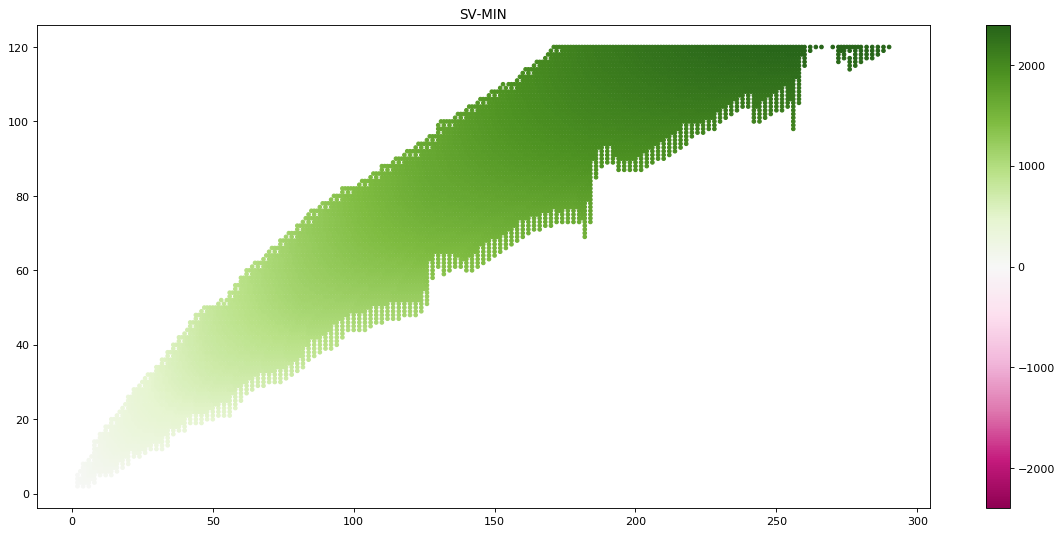

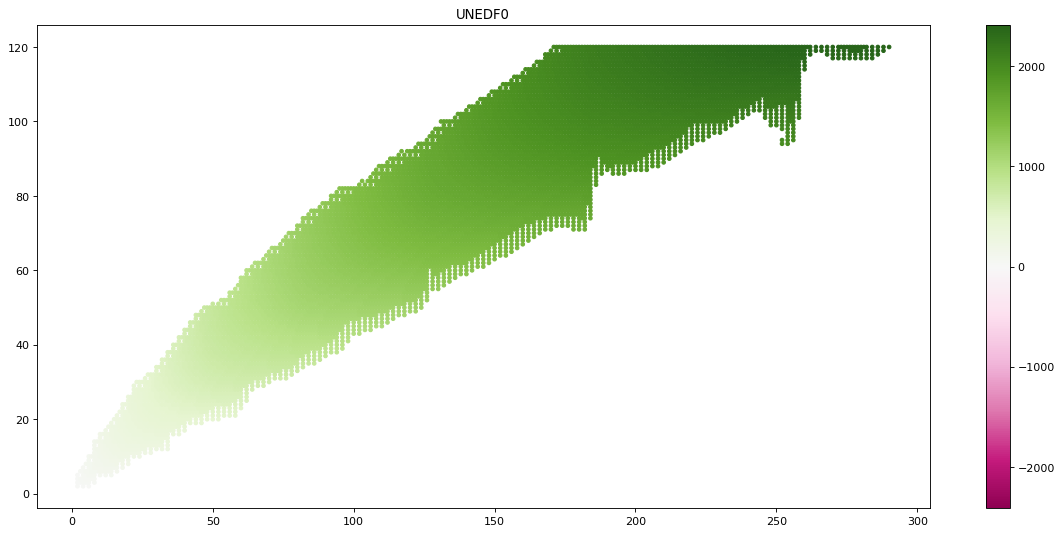

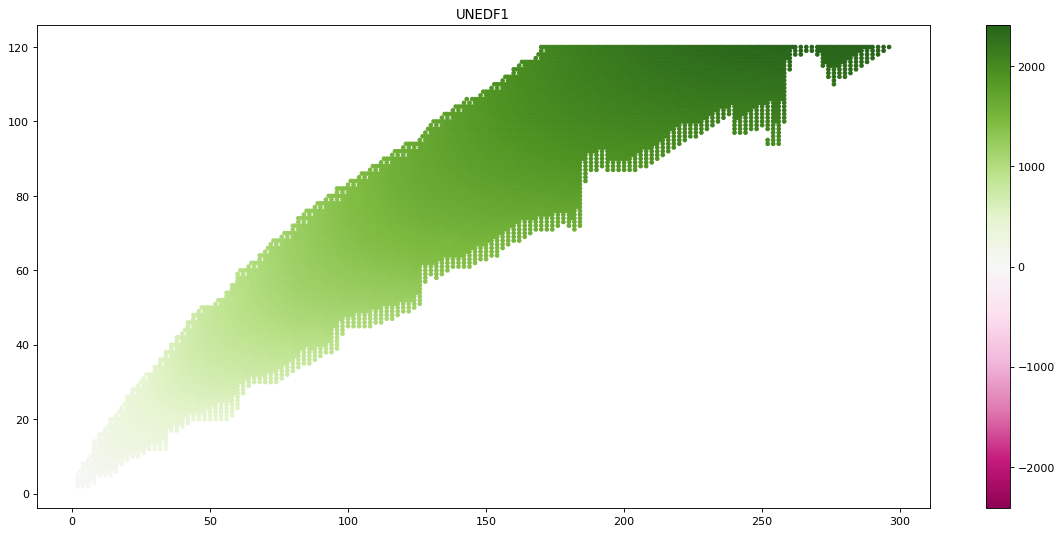

In [33]:
ext = np.int(np.ceil(max(-np.min(y_SKMS),np.max(y_SKMS))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKMS,Z_SKMS,c=y_SKMS,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SKMS')
plt.colorbar(sc)
plt.show()

ext = np.int(np.ceil(max(-np.min(y_SKP),np.max(y_SKP))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKP,Z_SKP,c=y_SKP,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SKP')
plt.colorbar(sc)
plt.show()

ext = np.int(np.ceil(max(-np.min(y_SLY4),np.max(y_SLY4))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SLY4,Z_SLY4,c=y_SLY4,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SLY4')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(y_SV),np.max(y_SV))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SV,Z_SV,c=y_SV,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SV-MIN')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(y_UNEDF0),np.max(y_UNEDF0))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_UNEDF0,Z_UNEDF0,c=y_UNEDF0,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('UNEDF0')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(y_UNEDF1),np.max(y_UNEDF1))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_UNEDF1,Z_UNEDF1,c=y_UNEDF1,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('UNEDF1')
plt.colorbar(sc)
plt.show()

#8 20 50 82


# finding the difference between exp and theoretical

# Theoretical Values that there are experimental values for

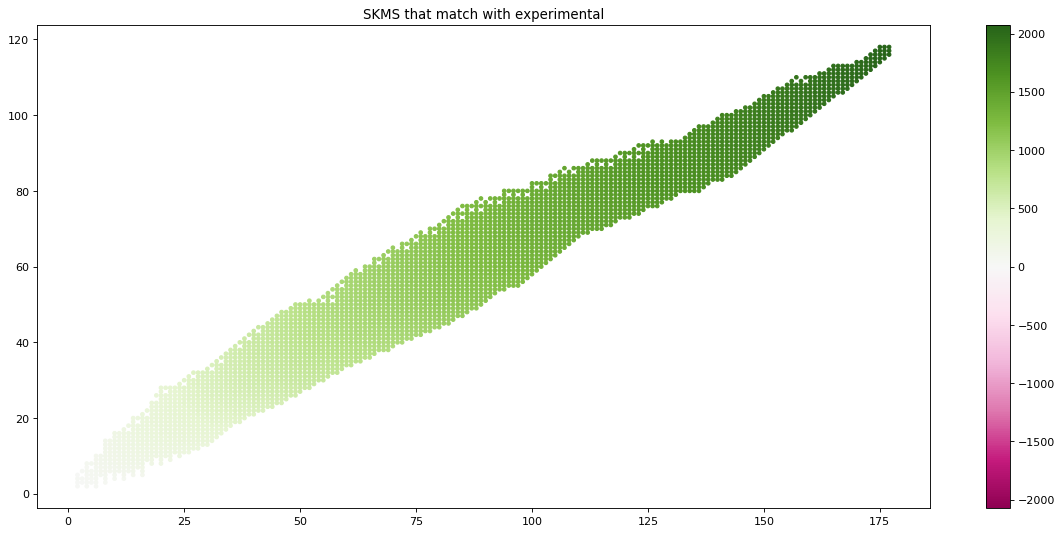

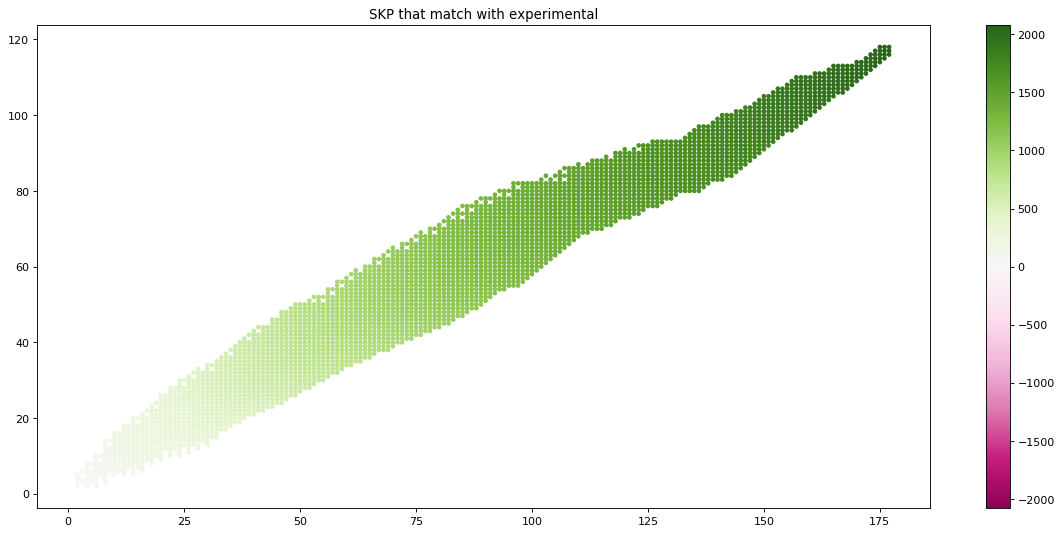

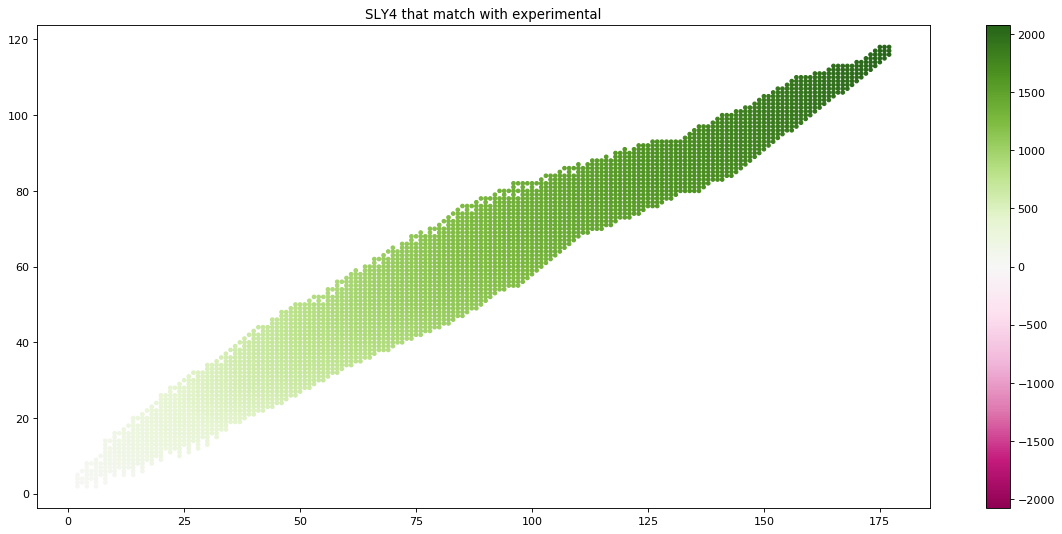

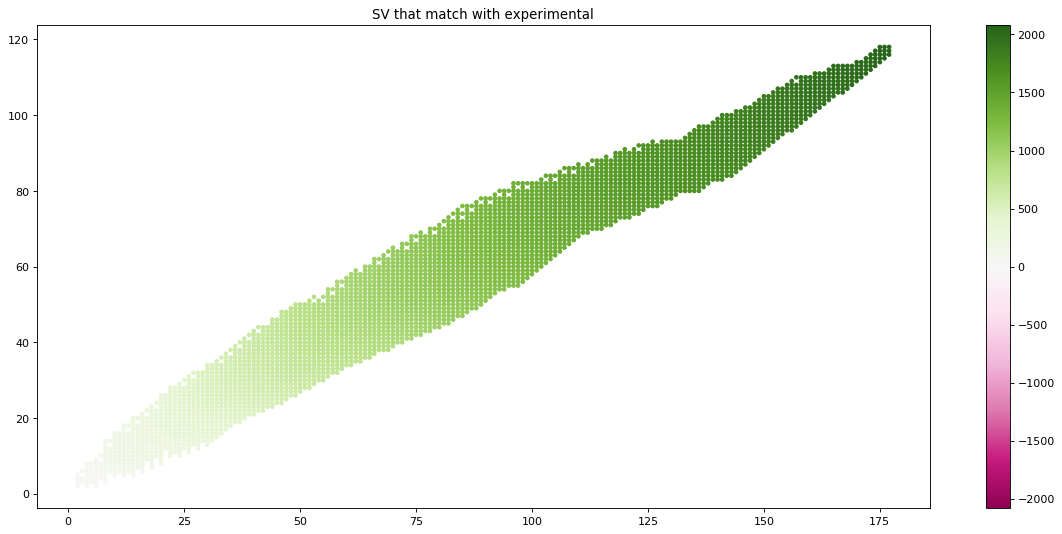

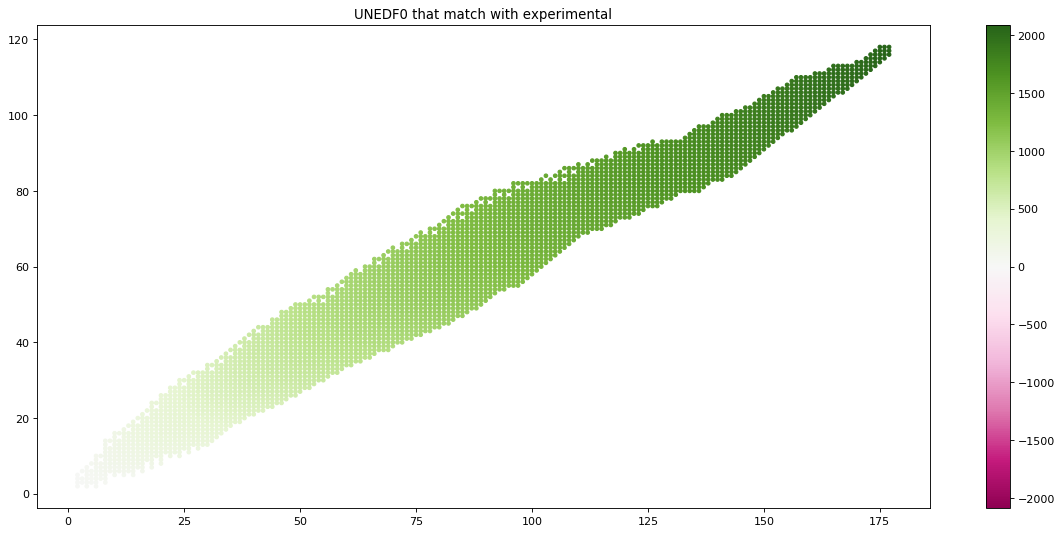

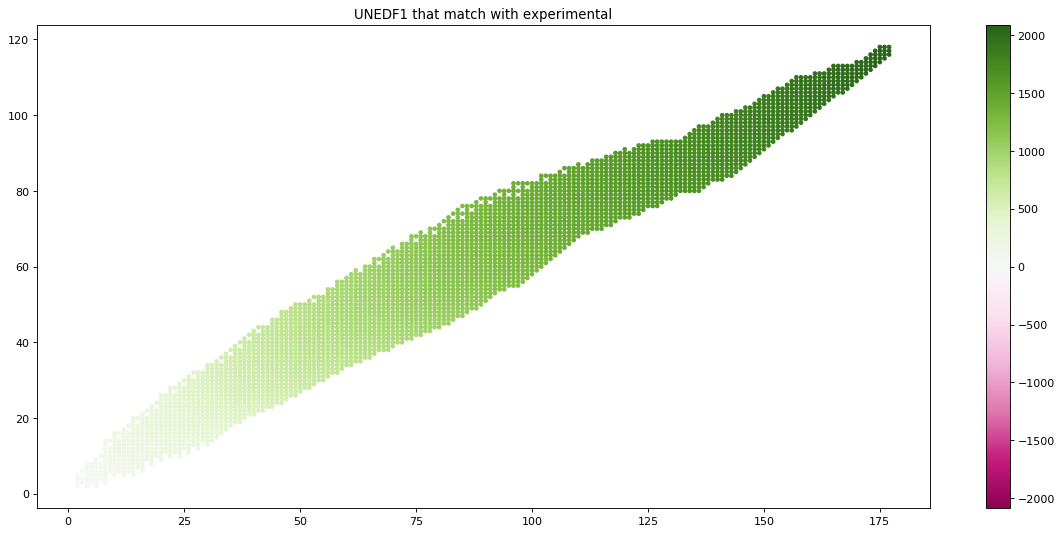

In [34]:
ext = np.int(np.ceil(max(-np.min(y_matSKMS),np.max(y_matSKMS))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matSKMS)[1],np.transpose(X_matSKMS)[0],c=y_matSKMS,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SKMS that match with experimental')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(y_matSKP),np.max(y_matSKP))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matSKP)[1],np.transpose(X_matSKP)[0],c=y_matSKP,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SKP that match with experimental')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(y_matSLY4),np.max(y_matSLY4))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matSLY4)[1],np.transpose(X_matSLY4)[0],c=y_matSLY4,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SLY4 that match with experimental')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(y_matSV),np.max(y_matSV))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matSV)[1],np.transpose(X_matSV)[0],c=y_matSV,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SV that match with experimental')
plt.colorbar(sc)
plt.show()



ext = np.int(np.ceil(max(-np.min(y_matUNEDF0),np.max(y_matUNEDF0))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matUNEDF0)[1],np.transpose(X_matUNEDF0)[0],c=y_matUNEDF0,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('UNEDF0 that match with experimental')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(y_matUNEDF1),np.max(y_matUNEDF1))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matUNEDF1)[1],np.transpose(X_matUNEDF1)[0],c=y_matUNEDF1,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('UNEDF1 that match with experimental')
plt.colorbar(sc)
plt.show()



# Difference between theoretical and experimental values

In [35]:
y_difSKMS  =y_matSKMS-y_expSKMS
y_difSKP   =y_matSKP -y_expSKP
y_difSLY4  =y_matSLY4-y_expSLY4
y_difSV    =y_matSV  -y_expSV
y_difUNEDF0=y_matUNEDF0-y_expUNEDF0
y_difUNEDF1=y_matUNEDF1-y_expUNEDF1

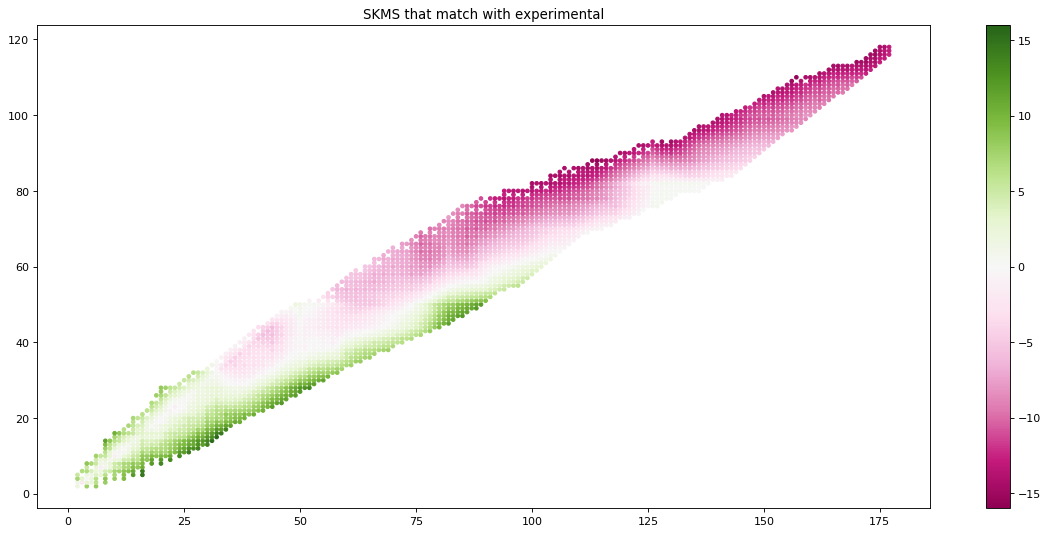

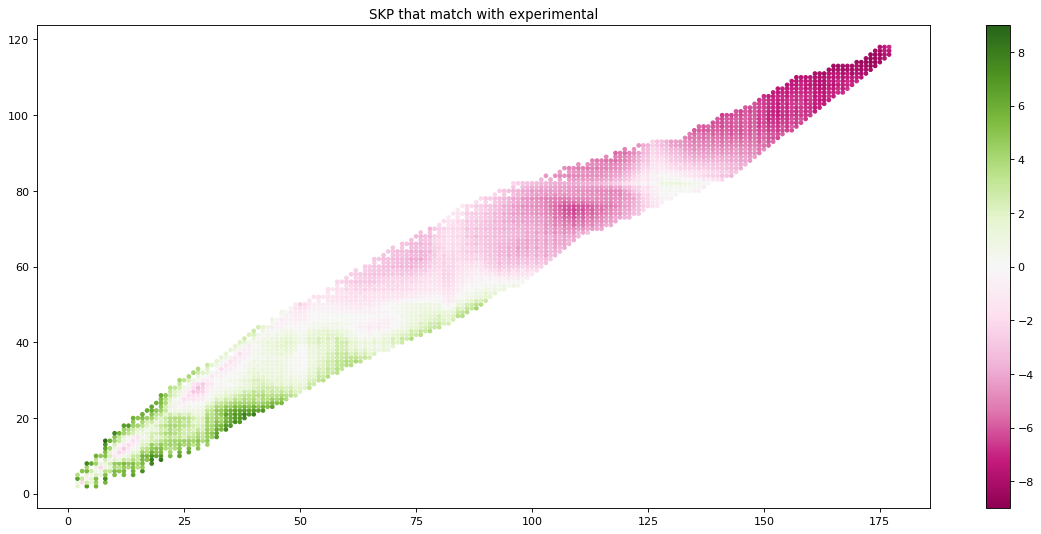

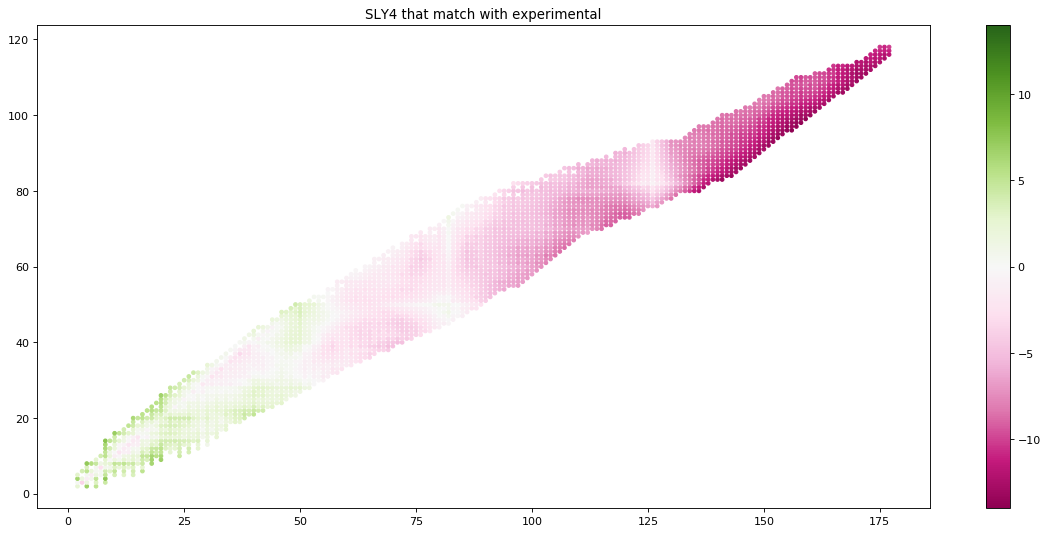

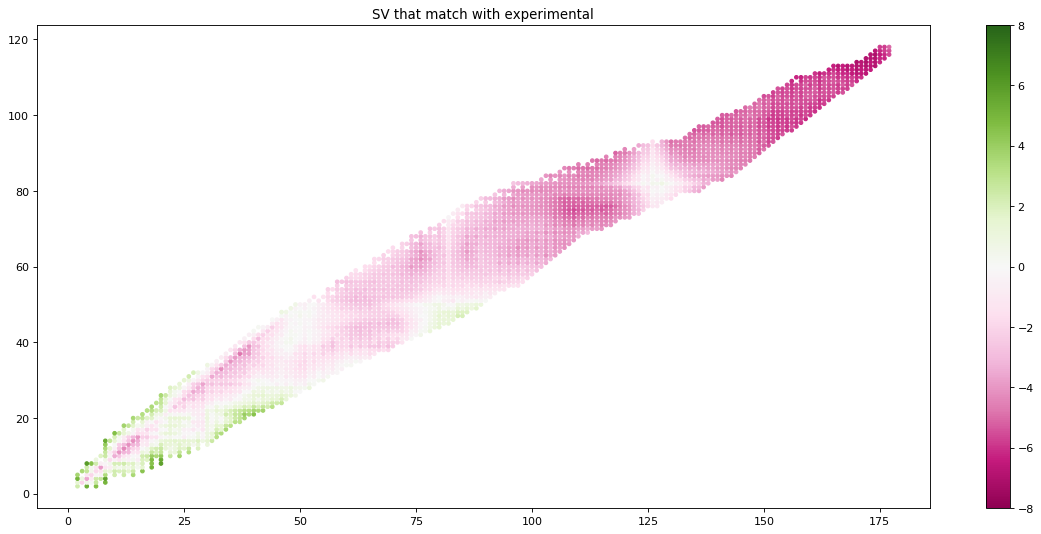

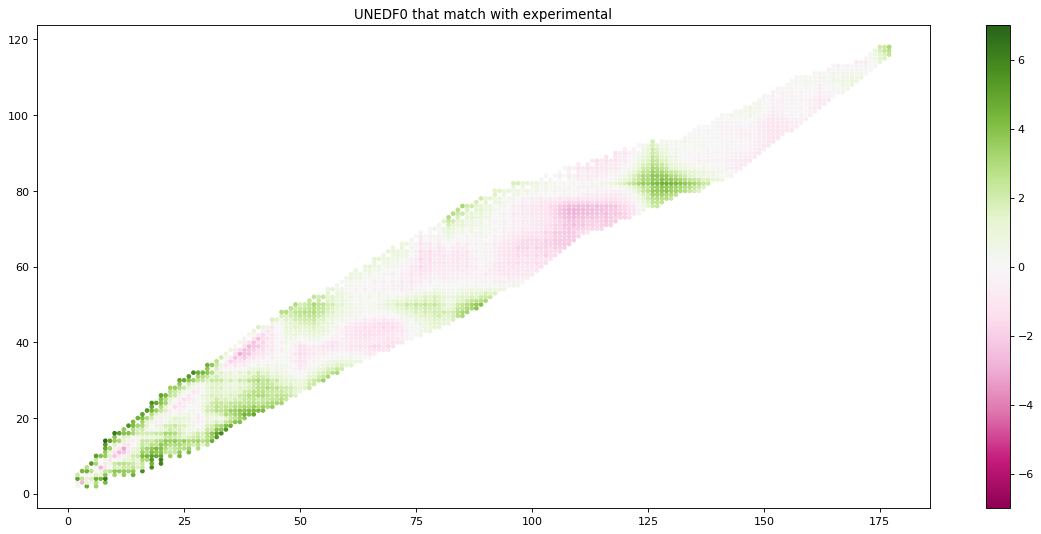

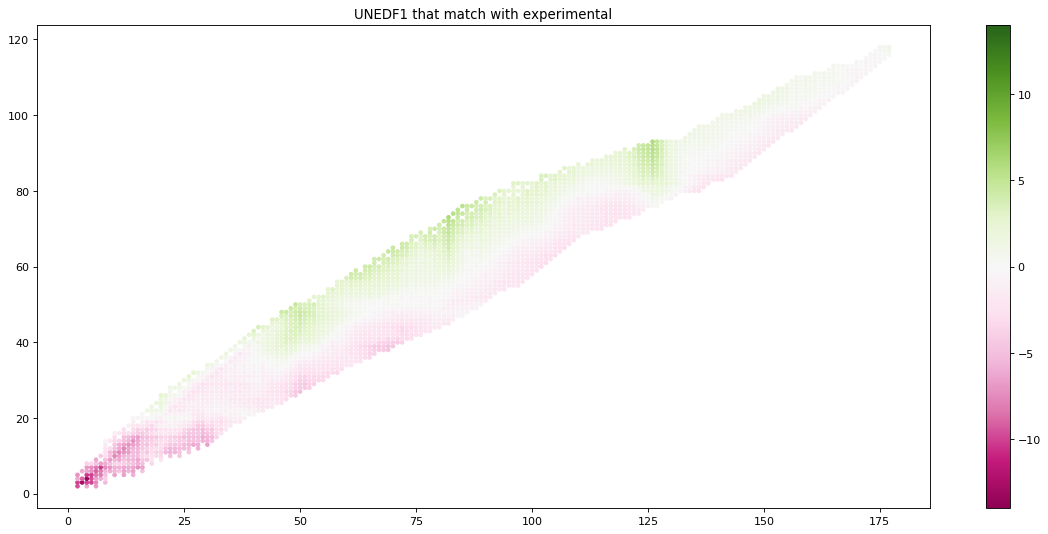

In [36]:
ext = np.int(np.ceil(max(-np.min(y_difSKMS),np.max(y_difSKMS))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matSKMS)[1],np.transpose(X_matSKMS)[0],c=y_difSKMS,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SKMS that match with experimental')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(y_difSKP),np.max(y_difSKP))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matSKP)[1],np.transpose(X_matSKP)[0],c=y_difSKP,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SKP that match with experimental')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(y_difSLY4),np.max(y_difSLY4))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matSLY4)[1],np.transpose(X_matSLY4)[0],c=y_difSLY4,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SLY4 that match with experimental')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(y_difSV),np.max(y_difSV))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matSV)[1],np.transpose(X_matSV)[0],c=y_difSV,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SV that match with experimental')
plt.colorbar(sc)
plt.show()



ext = np.int(np.ceil(max(-np.min(y_difUNEDF0),np.max(y_difUNEDF0))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matUNEDF0)[1],np.transpose(X_matUNEDF0)[0],c=y_difUNEDF0,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('UNEDF0 that match with experimental')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(y_difUNEDF1),np.max(y_difUNEDF1))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matUNEDF1)[1],np.transpose(X_matUNEDF1)[0],c=y_difUNEDF1,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('UNEDF1 that match with experimental')
plt.colorbar(sc)
plt.show()


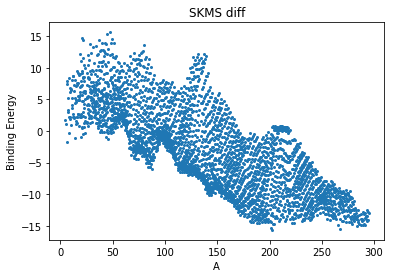

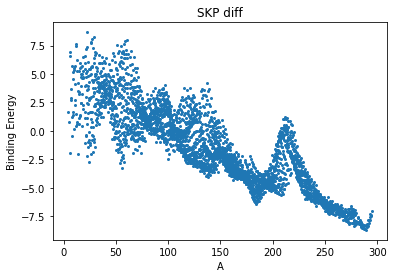

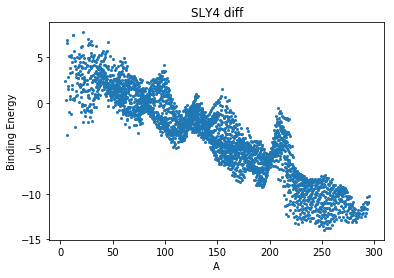

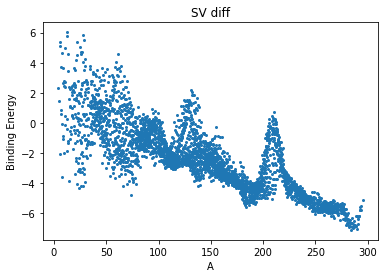

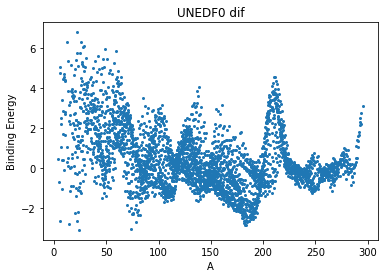

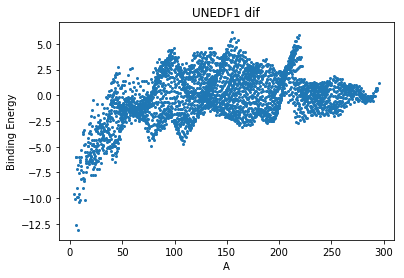

In [18]:
plt.plot(np.transpose(X_matSKMS)[1]+np.transpose(X_matSKMS)[0], y_difSKMS, 'o', markersize=2)
plt.title('SKMS diff')
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.show()

plt.plot(np.transpose(X_matSKP)[1]+np.transpose(X_matSKP)[0], y_difSKP, 'o', markersize=2)
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.title('SKP diff')
plt.show()


plt.plot(np.transpose(X_matSLY4)[1]+np.transpose(X_matSLY4)[0], y_difSLY4, 'o', markersize=2)
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.title('SLY4 diff')
plt.show()

plt.plot(np.transpose(X_matSV)[1]+np.transpose(X_matSV)[0], y_difSV, 'o', markersize=2)
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.title('SV diff')
plt.show()

plt.plot(np.transpose(X_matUNEDF0)[1]+np.transpose(X_matUNEDF0)[0], y_difUNEDF0, 'o', markersize=2)
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.title('UNEDF0 dif')
plt.show()

plt.plot(np.transpose(X_matUNEDF1)[1]+np.transpose(X_matUNEDF1)[0], y_difUNEDF1, 'o', markersize=2)
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.title('UNEDF1 dif')
plt.show()



# Random Forest Model

In [37]:
rf_SKMS    =RandomForestRegressor(n_estimators=1000 , random_state=42)
rf_SKP     =RandomForestRegressor(n_estimators=1000 , random_state=42)
rf_SLY4    =RandomForestRegressor(n_estimators=1000 , random_state=42)
rf_SV      =RandomForestRegressor(n_estimators=1000 , random_state=42)
rf_UNEDF0  =RandomForestRegressor(n_estimators=1000 , random_state=42)
rf_UNEDF1  =RandomForestRegressor(n_estimators=1000 , random_state=42)


In [38]:
X_trSKMS, X_teSKMS, y_trSKMS, y_teSKMS = train_test_split(X_matSKMS, y_difSKMS, test_size =25/100, random_state=42 )
X_trSKP, X_teSKP, y_trSKP, y_teSKP     = train_test_split(X_matSKP,  y_difSKP , test_size =25/100, random_state=42 )
X_trSLY4, X_teSLY4, y_trSLY4, y_teSLY4 = train_test_split(X_matSLY4, y_difSLY4, test_size =25/100, random_state=42 )
X_trSV, X_teSV, y_trSV, y_teSV = train_test_split(X_matSV, y_difSV, test_size =25/100, random_state=42 )
X_trUNEDF0, X_teUNEDF0, y_trUNEDF0, y_teUNEDF0 = train_test_split(X_matUNEDF0, y_difUNEDF0, test_size =25/100, random_state=42 )
X_trUNEDF1, X_teUNEDF1, y_trUNEDF1, y_teUNEDF1 = train_test_split(X_matUNEDF1, y_difUNEDF1, test_size =25/100, random_state=42 )
    

In [40]:
rf_SKMS.fit(X_trSKMS, y_trSKMS)
rf_SKP.fit(X_trSKP, y_trSKP)
rf_SLY4.fit(X_trSLY4, y_trSLY4)
rf_SV.fit(X_trSV, y_trSV)
rf_UNEDF0.fit(X_trUNEDF0, y_trUNEDF0)
rf_UNEDF1.fit(X_trUNEDF1, y_trUNEDF1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [41]:
print(rf_SKMS.score(X_trSKMS, y_trSKMS))
print(rf_SKP.score(X_trSKP, y_trSKP))
print(rf_SLY4.score(X_trSLY4, y_trSLY4))
print(rf_SV.score(X_trSV, y_trSV))
print(rf_UNEDF0.score(X_trUNEDF0, y_trUNEDF0))
print(rf_UNEDF1.score(X_trUNEDF1, y_trUNEDF1), '\n')

print(rf_SKMS.score(X_teSKMS, y_teSKMS))
print(rf_SKP.score(X_teSKP, y_teSKP))
print(rf_SLY4.score(X_teSLY4, y_teSLY4))
print(rf_SV.score(X_teSV, y_teSV))
print(rf_UNEDF0.score(X_teUNEDF0, y_teUNEDF0))
print(rf_UNEDF1.score(X_teUNEDF1, y_teUNEDF1))

0.9991282458675598
0.9975379664388065
0.998387828601498
0.9948996906418801
0.9900093846857906
0.9962641973664524 

0.99421312837622
0.9824097561680254
0.989440712782405
0.9628929711078678
0.9199657338018996
0.9735579943377632


In [29]:
y_difSKMStrml   =rf_SKMS.predict(X_trSKMS)
y_difSKMSteml   =rf_SKMS.predict(X_teSKMS)


y_difSKPtrml    =rf_SKP.predict(X_trSKP)
y_difSKPteml    =rf_SKP.predict(X_teSKP)


y_difSLY4trml   =rf_SLY4.predict(X_trSLY4)
y_difSLY4teml   =rf_SLY4.predict(X_teSLY4)


y_difSVtrml     =rf_SV.predict(X_trSV)
y_difSVteml     =rf_SV.predict(X_teSV)


y_difUNEDF0trml =rf_UNEDF0.predict(X_trUNEDF0)
y_difUNEDF0teml =rf_UNEDF0.predict(X_teUNEDF0)


y_difUNEDF1trml =rf_UNEDF1.predict(X_trUNEDF1)
y_difUNEDF1teml =rf_UNEDF1.predict(X_teUNEDF1)

In [56]:
print('SKMS mean train error:            ',    abs(np.mean(y_difSKMStrml     -y_trSKMS)*100))
print('SKMS mean test error:             ',    abs(np.mean(y_difSKMSteml     -y_teSKMS)*100) )  
print('SKMS train score:                 ',    rf_SKMS.score(X_trSKMS, y_trSKMS))
print('SKMS test score:                  ',    rf_SKMS.score(X_teSKMS, y_teSKMS))
print('SKMS train/test score difference: ',    rf_SKMS.score(X_trSKMS, y_trSKMS)-rf_SKMS.score(X_teSKMS, y_teSKMS), '\n\n')

print('SKP mean train error:             ',    abs(np.mean(y_difSKPtrml      -y_trSKP)*100)  )  
print('SKP mean  test error:             ',    abs(np.mean(y_difSKPteml      -y_teSKP)*100) )   
print('SKP train score:                  ',    rf_SKP.score(X_trSKP, y_trSKP))
print('SKP test score:                   ',    rf_SKP.score(X_teSKP, y_teSKP))
print('SKP train/test score difference:  ',    rf_SKP.score(X_trSKP, y_trSKP)-rf_SKP.score(X_teSKP, y_teSKP), '\n\n' )



print('SLY4 mean train error:              ',    abs(np.mean(y_difSLY4trml     -y_trSLY4 )*100) ) 
print('SLY4 mean test error:               ',    abs(np.mean(y_difSLY4teml     -y_teSLY4)*100)  ) 
print('SLY4 train score:                   ',    rf_SLY4.score(X_trSLY4, y_trSLY4))
print('SLY4 test score:                    ',    rf_SLY4.score(X_teSLY4, y_teSLY4))
print('SLY4 train/test score difference:   ',    rf_SLY4.score(X_trSLY4, y_trSLY4)-rf_SLY4.score(X_teSLY4, y_teSLY4), '\n\n' )



print('SV mean train error:             ',     abs(np.mean(y_difSVtrml       -y_trSV )*100) ) 
print('SV mean test error:              ',     abs(np.mean(y_difSVteml       -y_teSV)*100)  ) 
print('SV train score:                  ',     rf_SV.score(X_trSV, y_trSV))
print('SV test score:                   ',     rf_SV.score(X_teSV, y_teSV))
print('SV train/test score difference:  ',     rf_SV.score(X_trSV, y_trSV)-rf_SV.score(X_teSV, y_teSV), '\n\n')


print('UNEDF0 mean train error:            ',  abs(np.mean(y_difUNEDF0trml   -y_trUNEDF0)*100))
print('UNEDF0 mean test error:             ',    abs(np.mean(y_difUNEDF0teml   -y_teUNEDF0)*100) )
print('UNEDF0 train score:                 ',       rf_UNEDF0.score(X_trUNEDF0, y_trUNEDF0))
print('UNEDF0 test score:                  ',         rf_UNEDF0.score(X_teUNEDF0, y_teUNEDF0))
print('UNEDF0 train/test score difference: ', rf_UNEDF0.score(X_trUNEDF0, y_trUNEDF0)-rf_UNEDF0.score(X_teUNEDF0, y_teUNEDF0), '\n\n')


print('UNEDF1 mean train error:            ',  abs(np.mean(y_difUNEDF1trml   -y_trUNEDF1 )*100))
print('UNEDF1 mean test error:             ',   abs(np.mean(y_difUNEDF1teml   -y_teUNEDF1)*100) )
print('UNEDF1 train score:                 ',       rf_UNEDF0.score(X_trUNEDF0, y_trUNEDF0))
print('UNEDF1 test score:                  ',        rf_UNEDF0.score(X_teUNEDF0, y_teUNEDF0))
print('UNEDF1 train/test score difference: ', rf_UNEDF0.score(X_trUNEDF0, y_trUNEDF0)-rf_UNEDF0.score(X_teUNEDF0, y_teUNEDF0), '\n\n')



SKMS mean train error:             2.0939139923112813
SKMS mean test error:              1.5624601672920684
SKMS train score:                  0.9993634520618537
SKMS test score:                   0.9993847598434238
SKMS train/test score difference:  -2.130778157005686e-05 


SKP mean train error:              0.5566403231846224
SKP mean  test error:              0.6211234313667904
SKP train score:                   0.9980702882707144
SKP test score:                    0.99824641367732
SKP train/test score difference:   -0.0001761254066056095 


SLY4 mean train error:               0.37868282192614333
SLY4 mean test error:                0.3136412559892855
SLY4 train score:                    0.9986633025222149
SLY4 test score:                     0.9989252071667708
SLY4 train/test score difference:    -0.00026190464455588813 


SV mean train error:              0.3956711029037527
SV mean test error:               0.7844745511072239
SV train score:                   0.9959068757129117


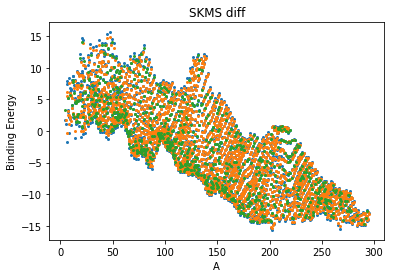

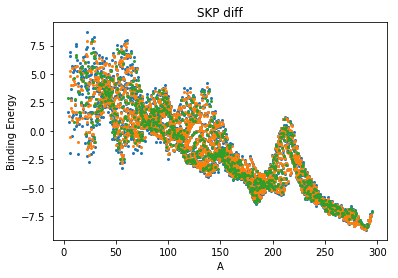

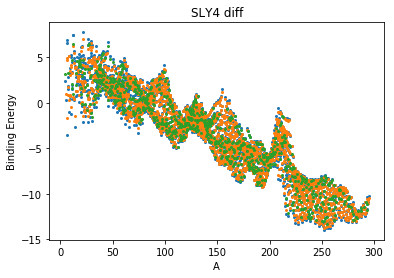

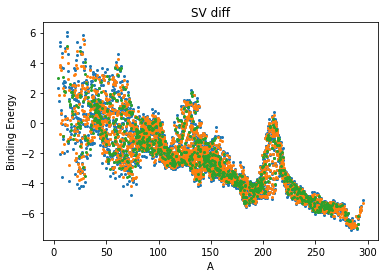

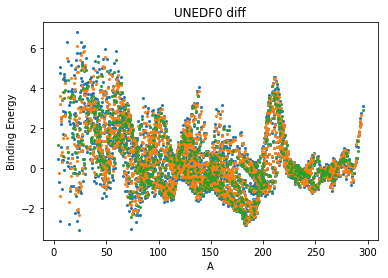

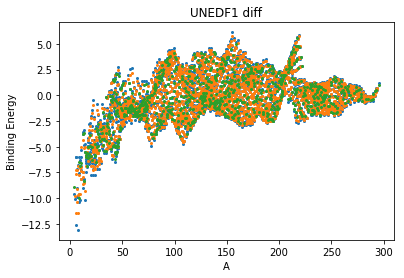

In [34]:
plt.plot(np.transpose(X_matSKMS)[1]+np.transpose(X_matSKMS)[0], y_difSKMS, 'o', markersize=2,   label= 'actual')
plt.plot(np.transpose(X_trSKMS)[1]+np.transpose(X_trSKMS)[0], y_difSKMStrml, 'o', markersize=2, label= 'train')
plt.plot(np.transpose(X_teSKMS)[1]+np.transpose(X_teSKMS)[0], y_difSKMSteml, 'o', markersize=2, label= 'test')
plt.title('SKMS diff')
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.show()

plt.plot(np.transpose(X_matSKP)[1]+np.transpose(X_matSKP)[0], y_difSKP, 'o', markersize=2,   label= 'actual')
plt.plot(np.transpose(X_trSKP)[1]+np.transpose(X_trSKP)[0], y_difSKPtrml, 'o', markersize=2, label= 'train')
plt.plot(np.transpose(X_teSKP)[1]+np.transpose(X_teSKP)[0], y_difSKPteml, 'o', markersize=2, label= 'test')
plt.title('SKP diff')
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.show()

plt.plot(np.transpose(X_matSLY4)[1]+np.transpose(X_matSLY4)[0], y_difSLY4, 'o', markersize=2,   label= 'actual')
plt.plot(np.transpose(X_trSLY4)[1]+np.transpose(X_trSLY4)[0], y_difSLY4trml, 'o', markersize=2, label= 'train')
plt.plot(np.transpose(X_teSLY4)[1]+np.transpose(X_teSLY4)[0], y_difSLY4teml, 'o', markersize=2, label= 'test')
plt.title('SLY4 diff')
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.show()

plt.plot(np.transpose(X_matSV)[1]+np.transpose(X_matSV)[0], y_difSV, 'o', markersize=2,   label= 'actual')
plt.plot(np.transpose(X_trSV)[1]+np.transpose(X_trSV)[0], y_difSVtrml, 'o', markersize=2, label= 'train')
plt.plot(np.transpose(X_teSV)[1]+np.transpose(X_teSV)[0], y_difSVteml, 'o', markersize=2, label= 'test')
plt.title('SV diff')
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.show()

plt.plot(np.transpose(X_matUNEDF0)[1]+np.transpose(X_matUNEDF0)[0], y_difUNEDF0, 'o', markersize=2,   label= 'actual')
plt.plot(np.transpose(X_trUNEDF0)[1]+np.transpose(X_trUNEDF0)[0], y_difUNEDF0trml, 'o', markersize=2, label= 'train')
plt.plot(np.transpose(X_teUNEDF0)[1]+np.transpose(X_teUNEDF0)[0], y_difUNEDF0teml, 'o', markersize=2, label= 'test')
plt.title('UNEDF0 diff')
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.show()

plt.plot(np.transpose(X_matUNEDF1)[1]+np.transpose(X_matUNEDF1)[0], y_difUNEDF1, 'o', markersize=2,   label= 'actual')
plt.plot(np.transpose(X_trUNEDF1)[1]+np.transpose(X_trUNEDF1)[0], y_difUNEDF1trml, 'o', markersize=2, label= 'train')
plt.plot(np.transpose(X_teUNEDF1)[1]+np.transpose(X_teUNEDF1)[0], y_difUNEDF1teml, 'o', markersize=2, label= 'test')
plt.title('UNEDF1 diff')
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.show()






In [22]:
y_difSKMSml   =rf_SKMS.predict(X_matSKMS)
y_difSKPml    =rf_SKP.predict(X_matSKP)
y_difSLY4ml   =rf_SLY4.predict(X_matSLY4)
y_difSVml     =rf_SV.predict(X_matSV)
y_difUNEDF0ml =rf_UNEDF0.predict(X_matUNEDF0)
y_difUNEDF1ml =rf_UNEDF1.predict(X_matUNEDF1)

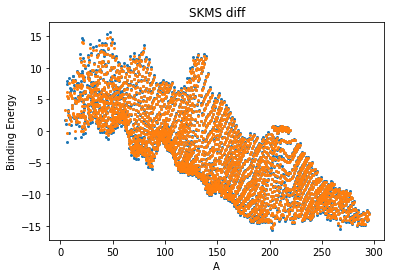

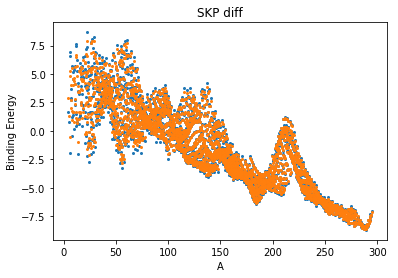

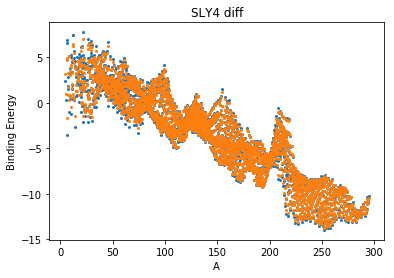

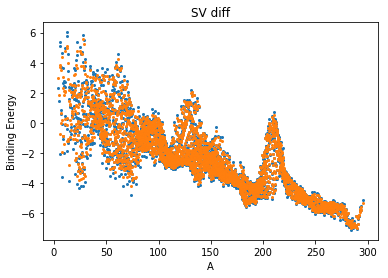

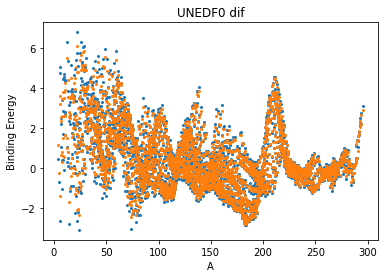

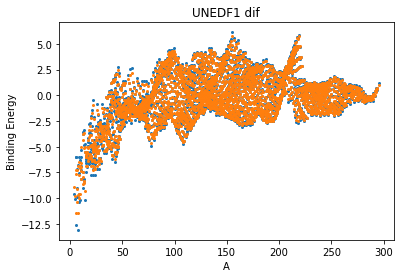

In [23]:
plt.plot(np.transpose(X_matSKMS)[1]+np.transpose(X_matSKMS)[0], y_difSKMS, 'o', markersize=2)
plt.plot(np.transpose(X_matSKMS)[1]+np.transpose(X_matSKMS)[0], y_difSKMSml, 'o', markersize=2)
plt.title('SKMS diff')
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.show()

plt.plot(np.transpose(X_matSKP)[1]+np.transpose(X_matSKP)[0], y_difSKP, 'o', markersize=2)
plt.plot(np.transpose(X_matSKP)[1]+np.transpose(X_matSKP)[0], y_difSKPml, 'o', markersize=2)
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.title('SKP diff')
plt.show()


plt.plot(np.transpose(X_matSLY4)[1]+np.transpose(X_matSLY4)[0], y_difSLY4, 'o', markersize=2)
plt.plot(np.transpose(X_matSLY4)[1]+np.transpose(X_matSLY4)[0], y_difSLY4ml, 'o', markersize=2)
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.title('SLY4 diff')
plt.show()

plt.plot(np.transpose(X_matSV)[1]+np.transpose(X_matSV)[0], y_difSV, 'o', markersize=2)
plt.plot(np.transpose(X_matSV)[1]+np.transpose(X_matSV)[0], y_difSVml, 'o', markersize=2)
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.title('SV diff')
plt.show()

plt.plot(np.transpose(X_matUNEDF0)[1]+np.transpose(X_matUNEDF0)[0], y_difUNEDF0, 'o', markersize=2)
plt.plot(np.transpose(X_matUNEDF0)[1]+np.transpose(X_matUNEDF0)[0], y_difUNEDF0ml, 'o', markersize=2)
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.title('UNEDF0 dif')
plt.show()

plt.plot(np.transpose(X_matUNEDF1)[1]+np.transpose(X_matUNEDF1)[0], y_difUNEDF1, 'o', markersize=2)
plt.plot(np.transpose(X_matUNEDF1)[1]+np.transpose(X_matUNEDF1)[0], y_difUNEDF1ml, 'o', markersize=2)
plt.ylabel('Binding Energy')
plt.xlabel('A')
plt.title('UNEDF1 dif')
plt.show()
